In [1]:
#import necessary packages used for manipulating operations on image
#cv2 for reading and displaying, writing image
#numpy for manipulating image as image is matrix of pixel values
#skimage is package which provides many methods which help to transform image

In [1]:
import cv2
import numpy as np
from skimage import io 
from skimage.transform import rotate, AffineTransform, warp
import matplotlib.pyplot as plt
import random
from skimage import img_as_ubyte
import os
from skimage.util import random_noise

In [13]:
img= cv2.imread(r"C:\Users\deepa\Documents\SB-ML\Data\Google-Image-Scraper-master\Google-Image-Scraper-master\Parts-image\left\Engine pics1.jpeg")
#img= io.imread(r"C:\Users\deepa\Documents\SB-ML\Data\Google-Image-Scraper-master\Google-Image-Scraper-master\Parts-image\left\Engine pics1.jpeg")
img= cv2.cvtColor(img, cv2.COLOR_RGB2BGR) #we are converting image to BGR because matplotlib displays image BGR format
#if you are using cv2 for displaying image, no need to convert image to BGR
#img

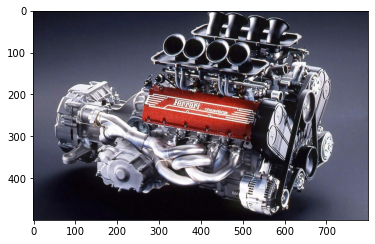

In [14]:
plt.imshow(img)
plt.show()

In [5]:
#lets check size and dimensions of image

In [15]:
height, width, dims= img.shape
print(height, width, dims) #print dimensions of original image

500 800 3


In [7]:
#image's dimension is 3 because its RGB image in which each channel is a matrix of (720 X 1280) pixels.

In [8]:
#lets convert image to gray scale

In [16]:
gray= cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) # use cv2.COLOR_RGB2GRAY if you are using cv2 for displaying image,
#it doesn't matter while converting image to grayscale

In [17]:
print(gray.shape)

(500, 800)


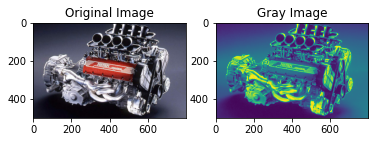

In [18]:
plt.subplot(121)
plt.imshow(img)
plt.title("Original Image")
plt.subplot(122)
plt.imshow(gray)
plt.title("Gray Image")
plt.show()

In [12]:

#dims(number of matrices) will be 1 for grayscale image because then it will have only one channel

In [13]:
#lets get to the image augmentation part
#as image is just matrix of pixel we can manipulate it easily using powerful library numpy
#we will use original image(RGB) for image augmentation, you can use also gray scale. it doesn't matter 
#its always the best case if our image is squared, so lets resize it to(700 X 700), we will discuss the reason in as we go through it.

In [19]:
img= cv2.resize(img,(700,700))
img.shape

(700, 700, 3)

In [15]:
#flipping image means flipping matrix, its that simple
#numpy provides methods like fliplr and flipud for flipping matrix horizontally and vertically

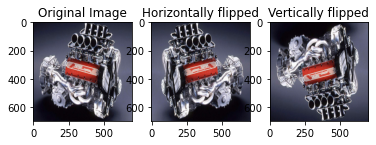

In [20]:
plt.subplot(131) 
plt.title("Original Image") 
plt.imshow(img)

hflipped_image= np.fliplr(img) #fliplr reverse the order of columns of pixels in matrix
plt.subplot(132) 
plt.title("Horizontally flipped")
plt.imshow(hflipped_image)

vflipped_image= np.flipud(img) #flipud reverse the order of rows of pixels in matrix
plt.subplot(133)
plt.title("Vertically flipped")
plt.imshow(vflipped_image)
plt.show()

In [21]:
#flipping can also be achieved by using method from PIL library like image.transpose(Image.FLIP_LEFT_RIGHT) for horizontal flipping and
#image.transpose(Image.FLIP_TOP_BOTTOM) for vertically flipping

In [22]:
#lets check the image rotation part
#skimage.transform provides method "rotate()""

In [21]:
r_image = rotate(img, angle=45) # angle value is positive for anticlockwise rotation 
r_image1 = rotate(img, angle=-45) #angle value is negative for clockwise rotation

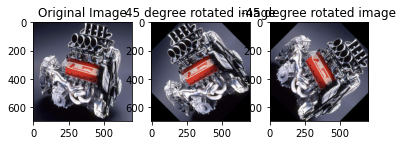

In [22]:
plt.subplot(131)
plt.imshow(img)
plt.title("Original Image")
plt.subplot(132)
plt.imshow(r_image)
plt.title("45 degree rotated image")
plt.subplot(133)
plt.imshow(r_image1)
plt.title("-45 degree rotated image")
plt.show()

In [25]:
#using flipping and rotation, we can generate 10 times the data we have
#we also have some other transforming methods like transform which shift the pixel value in image

In [26]:
# location in the final output image.
# After the shift operation, an object present at a location (x,y) in the input image is shifted to a new position (X, Y):
# X = x + dx
# Y = y + dy

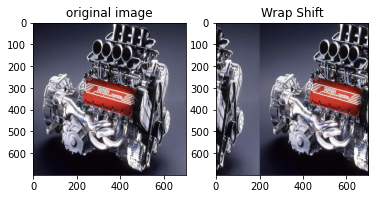

In [23]:
transform = AffineTransform(translation=(-200,0))  # (-200,0) are x and y coordinate, change it see the effect
warp_image = warp(img,transform, mode="wrap") #mode parameter is optional
# mode= {'constant', 'edge', 'symmetric', 'reflect', 'wrap'}
#these are possible values of mode, you can try them and decide which one to use, default value for mode is constant
plt.subplot(1,2,1)
plt.title('original image')
plt.imshow(img)
plt.subplot(1,2,2)
plt.title('Wrap Shift')
plt.imshow(warp_image)

In [24]:
noisy_image= random_noise(img)

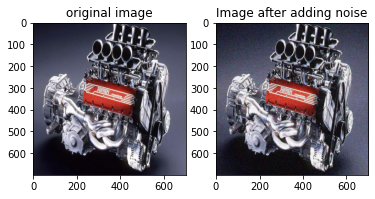

In [25]:
plt.subplot(1,2,1)
plt.title('original image')
plt.imshow(img)
plt.subplot(1,2,2)
plt.title('Image after adding noise')
plt.imshow(noisy_image)

In [26]:
blur_image= cv2.GaussianBlur(img, (11,11),0)

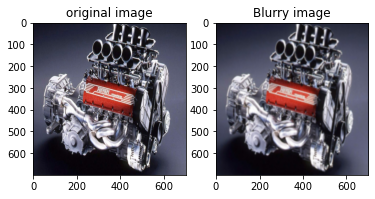

In [27]:
plt.subplot(1,2,1)
plt.title('original image')
plt.imshow(img)
plt.subplot(1,2,2)
plt.title('Blurry image')
plt.imshow(blur_image)

In [28]:
#Lets define functions for each operation
def anticlockwise_rotation(image):
    angle= random.randint(0,180)
    return rotate(image, angle)

def clockwise_rotation(image):
    angle= random.randint(0,180)
    return rotate(image, -angle)

def h_flip(image):
    return  np.fliplr(image)

def v_flip(image):
    return np.flipud(image)

def add_noise(image):
    return random_noise(image)

def blur_image(image):
    return cv2.GaussianBlur(img, (9,9),0)

#I would not recommend warp_shifting, because it distorts image, but can be used in many use case like 
#classifying blur and non-blur images
def warp_shift(image): 
    transform = AffineTransform(translation=(0,40))  #chose x,y values according to your convinience
    warp_image = warp(image, transform, mode="wrap")
    return warp_image

In [ ]:
transformations = {'rotate anticlockwise': anticlockwise_rotation,
                      'rotate clockwise': clockwise_rotation,
                      'horizontal flip': h_flip, 
                      'vertical flip': v_flip,
                   'warp shift': warp_shift,
                   'adding noise': add_noise,
                   'blurring image':blur_image
                 }                #use dictionary to store names of functions 

images_path=r"C:\Users\deepa\Documents\SB-ML\Data\Google-Image-Scraper-master\Google-Image-Scraper-master\Parts-image\Transmission" #path to original images
augmented_path=r"C:\Users\deepa\Documents\SB-ML\Data\Google-Image-Scraper-master\Google-Image-Scraper-master\Parts-image\Aumented_Images" # path to store aumented images
images=[] # to store paths of images from folder

for im in os.listdir(images_path):  # read image name from folder and append its path into "images" array     
    images.append(os.path.join(images_path,im))

images_to_generate=2000  #you can change this value according to your requirement
i=1                        # variable to iterate till images_to_generate

while i<=images_to_generate:    
    image=random.choice(images)
    original_image = io.imread(image)
    transformed_image=None
#     print(i)
    n = 0       #variable to iterate till number of transformation to apply
    transformation_count = random.randint(1, len(transformations)) #choose random number of transformation to apply on the image
    
    while n <= transformation_count:
        key = random.choice(list(transformations)) #randomly choosing method to call
        transformed_image = transformations[key](original_image)
        n = n + 1
        
    new_image_path= "%s/augmented_image_%s.jpg" %(augmented_path, i)
    transformed_image = img_as_ubyte(transformed_image)  #Convert an image to unsigned byte format, with values in [0, 255].
    transformed_image=cv2.cvtColor(transformed_image, cv2.COLOR_BGR2RGB) #convert image to RGB before saving it
    cv2.imwrite(new_image_path, transformed_image) # save transformed image to path
    i =i+1
#to generate more images, put above 3 statement inside while n<... loop

In [35]:
#hooray! you have created 2000 images from 289 images
#you can create more than 2000 using 289 images.